In [1]:
import pandas as pd
import pandas_profiling as pp
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline
import scipy.stats as stats
import numpy as np

/Users/davidchung/.pyenv/versions/3.6.0/lib/python3.6/site-packages/pandas/compat/__init__.py:84: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/Users/davidchung/.pyenv/versions/3.6.0/lib/python3.6/site-packages/pandas/compat/__init__.py:84: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
data = pd.read_csv('data/updated_genesco.csv')

In [4]:
#change column name 'class' to 'classes',class is a keyword
data.rename(columns={'class':'classes'},inplace=True)

In [5]:
pos_sales_growth = data[data['comp_pct']>0]
neg_sales_growth = data[data['comp_pct']<0]

In [6]:
pos_sales_growth = pos_sales_growth.sort_values(by='comp_pct',ascending=False)


In [8]:
pos_sales_growth=pos_sales_growth.iloc[1:]

In [9]:
pos_sales_growth = pos_sales_growth.sort_values(by='comp_pct',ascending=False)
neg_sales_growth = neg_sales_growth.sort_values(by='comp_pct')

In [20]:
psg=pos_sales_growth.iloc[:10000]
neg=neg_sales_growth.iloc[:10000]

psg500=pos_sales_growth.iloc[:500]
neg500=neg_sales_growth.iloc[:500]

psg1000=pos_sales_growth.iloc[:1000]
neg1000=neg_sales_growth.iloc[:1000]

In [23]:
psg500.head()

,Unnamed: 0,div_x,store,week_end_date,fiscal_year,fiscal_week,fiscal_month,sales_amt_ty,sales_amt_ly,comp_pct,fiscal_year_ly,fiscal_week_ly,fiscal_month_ly,week_end_date_ly,mark_down_amt_ty,mark_down_amt_ly,payroll_adj_hours,num_of_days,strak_traffic,strak_hrs,strak_sales_amt,strak_transaction_num,cp_valid_emails,cp_valid_mailing_address,cp_total_trans,cp_emails_per_trans,cp_mail_add_capture_rate,cp_email_mail_capture_rate,cp_total_email_trans,special_order_amt,sales_units,sales_value,shoes_units,shoes_value,multi_units,multi_value,payroll_units,payroll_value,accessory_units,accessory_value,accessory_hosiery_units,accessory_hosiery_value,accessory_shoe_trees_units,accessory_shoe_trees_value,accessory_coats_units,accessory_coats_value,accessory_shirt_sweater_units,accessory_shirt_sweater_value,accessory_plgs_luggage_units,accessory_plgs_luggage_value,accessory_belts_units,accessory_belts_value,accessory_shoe_care_units,accessory_shoe_care_value,accessory_other_units,accessory_other_value,trans_cnt_sales,trans_cnt_returns,trans_cnt_exchg,trans_cnt_exchg_even,trans_cnt_exchg_out,trans_cnt_exchg_in,trans_cnt_empl_sales,trans_cnt_empl_returns,trans_cnt_total,trans_cnt_exchg_cashier,trans_cnt_exchg_original,metric_trans_num,ty_mark_down_pct,ly_mark_down_pct,strak_conversion_pct,strak_sls_per_shopper,strak_avg_trans_size,strak_shopper_to_assoc_ratio,strak_comp_traffic_delta,units_per_trans,dollar_per_trans,shoe_multi_pct,special_order_pct_to_sls,footwear_units_pct,nonfootwear_units_pct,avg_unit_price,avg_footwewar_price,avg_nonfootwewar_price,footwear_amt_pct,nonfootwear_amt_pct,multi_amt_pct,payroll_pct,avg_pay_per_hr,sales_amt_per_pay_hour,mgr_count,mgr_tenure_days,avg_mgr_tenure_days,am_count,am_tenure_days,avg_am_tenure_days,ft_count,ft_tenure_days,avg_ft_tenure_days,pt_count,pt_tenure_days,avg_pt_tenure_days,num_of_emps,tot_tenure_days,tot_avg_tenure_days,div_y,classes,rptcode,volume_band,Day,Month,Year,growth
457,457,7,1508,2018-09-01,2019,30,7,31059.63,3471.99,7.945772,2018,31,8,2-Sep-17,1281.63,235.40,206,7,1404,212.70,31059.63,178,113,141,198,0.66471,0.71212,0.68841,170,4258.83,402,31059.63,121,20056.88,39,5998.52,212.76,3963.27,281,11002.75,81,850.19,7,204.0,9,1918.98,48,3616.02,1,42.00,44,2718.49,74,441.50,3,198.50,162,6,15,10,1,4,1,0,184,15,15,156,0.041264,0.067800,0.126781,22.122244,174.492303,6.600846,7.818991,2.576923,199.100192,0.322314,0.137118,0.300995,0.699005,0.012943,165.759339,39.155694,0.645754,0.354246,0.299075,0.127602,18.627891,145.984349,1,16242,16242.0,1,3653,3653.0,3,4268,1422.67,1,1270,1270.00,6,25433,4239,7,Mall,S,5,1,9,2018,pos
8460,8460,7,1709,2017-01-14,2017,50,12,12859.29,1685.28,6.630358,2016,50,12,16-Jan-16,818.09,188.55,103,7,981,106.95,12859.29,109,63,94,119,0.53846,0.78992,0.66419,117,1943.79,198,12859.29,36,5139.60,15,2079.91,106.96,1728.50,162,7719.69,47,574.00,0,0.0,18,2779.87,31,1669.18,2,141.99,23,1409.97,29,119.75,3,65.02,100,3,8,4,0,4,1,0,112,8,8,97,0.063619,0.111881,0.111111,13.108349,117.975138,9.172511,6.519247,2.041237,132.570000,0.416667,0.151158,0.181818,0.818182,0.015397,142.766667,47.652407,0.399680,0.600320,0.404683,0.134416,16.160247,120.225224,1,1919,1919.0,0,0,0.0,0,0,0.00,3,714,238.00,4,2633,658,7,Airport,A,1,14,1,2017,pos
7530,7530,7,1699,2017-09-16,2018,33,8,20484.07,3125.15,5.554588,2017,33,8,17-Sep-16,1362.58,330.35,119,7,758,120.22,20484.07,138,84,91,147,0.60000,0.61905,0.60952,140,2826.97,247,20484.07,84,13823.74,24,3760.91,120.25,2789.70,163,6660.33,51,591.78,5,119.0,9,1250.00,49,3659.98,0,0.00,14,809.48,32,174.50,3,55.59,125,4,9,9,0,0,4,0,142,9,9,121,0.066519,0.105707,0.182058,27.023839,148.435290,6.305107,5.372530,2.041322,169.289835,0.285714,0.138008,0.340081,0.659919,0.012058,164.568333,40.860920,0.674853,0.325147,0.272062,0.136189,23.199168,170.345696,1,103,103.0,1,551,551.0,0,0,0.00,1,370,370.00,3,1024,341,7,Street,S,4,16,9,2017,pos
2526,2526,7,1597,2018-10-27,2019,38,9,32269.05,4959.29,5.506788,2018,39,9,28-Oct-17,1483.95,374.02,155,7,1487,156.98,32269.05,146,1

In [22]:
#new column to add classification of pos or neg comp pct
psg['growth']='pos'
neg['growth']='neg'

psg500['growth']='pos'
neg500['growth']='neg'

psg1000['growth']='pos'
neg1000['growth']='neg'

/Users/davidchung/.pyenv/versions/3.6.0/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/davidchung/.pyenv/versions/3.6.0/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/davidchung/.pyenv/versions/3.6.0/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy

In [27]:
#concat both pos and neg to one df
psg_neg=pd.concat([psg,nsg])
psg_neg500=pd.concat([psg500,neg500])
psg_neg1000=pd.concat([psg1000,neg1000])

In [121]:
# only keep 'classes' and 'growth' to visualize type of stores
psg_nsg_classes=psg_nsg[['classes','growth','volume_band']]


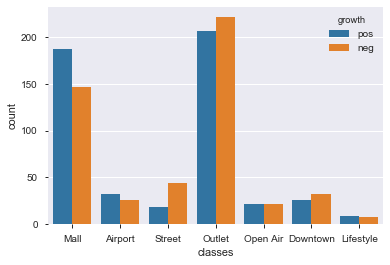

In [33]:
sns.countplot(x="classes", hue='growth',data=psg_neg500);

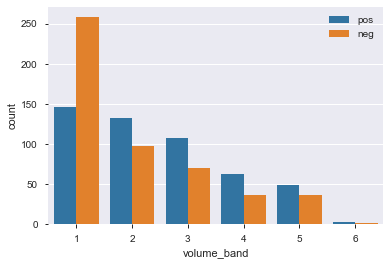

In [34]:
sns.countplot(x="volume_band", hue='growth',data=psg_neg500)
plt.legend(loc='upper right');

In [80]:
psg_neg.groupby(['classes','growth']).strak_shopper_to_assoc_ratio.mean()

classes    growth
Airport    neg       10.781852
           pos       12.006302
Downtown   neg        6.533944
           pos        6.622832
Lifestyle  neg        3.498915
           pos        3.710606
Mall       neg        7.015132
           pos        7.460631
Open Air   neg        4.391694
           pos        5.334313
Outlet     neg        6.778602
           pos        7.637913
Street     neg        4.199587
           pos        4.442140
Name: strak_shopper_to_assoc_ratio, dtype: float64

In [76]:
psg_neg1000_traffic=pd.DataFrame(psg_neg1000.groupby(['classes','growth']).strak_traffic.mean())
psg_neg500_traffic=pd.DataFrame(psg_neg500.groupby(['classes','growth']).strak_traffic.mean())
psg_neg_traffic=pd.DataFrame(psg_neg.groupby(['classes','growth']).strak_traffic.mean())

In [81]:
psg_neg1000_traffic=psg_neg1000_traffic.reset_index()
psg_neg500_traffic=psg_neg500_traffic.reset_index()
psg_neg_traffic=psg_neg1000_traffic.reset_index()

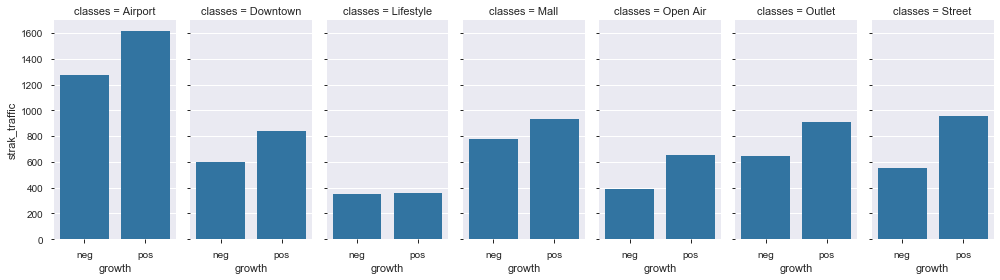

In [82]:
g = sns.FacetGrid(psg_neg_traffic, col="classes", height=4, aspect=.5)
g.map(sns.barplot, "growth", "strak_traffic");

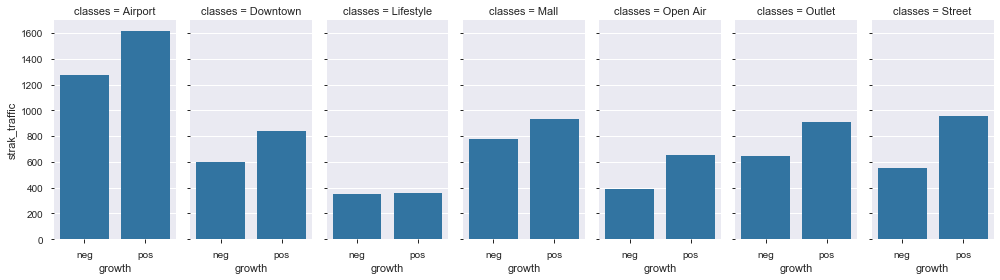

In [73]:
g = sns.FacetGrid(psg_neg1000_traffic, col="classes", height=4, aspect=.5)
g.map(sns.barplot, "growth", "strak_traffic");

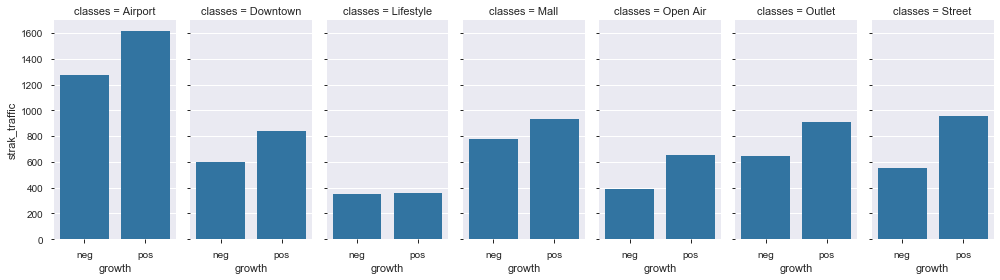

In [83]:
g = sns.FacetGrid(psg_neg500_traffic, col="classes", height=4, aspect=.5)
g.map(sns.barplot, "growth", "strak_traffic");